- Feature enginerring

    - Missing value analysis

    - Outlier analysis

    - Categorical to Numerical

    - Correlation

    - Data scaling

$Feature$-$Selection$

we should not provide all the columns for model development

some columns are very important, some columns are not at all important

we need to select the imporatnt features so that our model performance will increase

**Retrival the important features, selecting an important features is very important step before going to ML**

- Droping the constant fetaures ( Regression and classification)

- Information gain (Classification)

- p-value (Regression)

- VIF (Regression)

- Forward selection and backward selection (Regression and classification)

- Correlation with target column ( Regression and classification)

Feature selection methods

1) Variance threshold:
    
    - based on variance we can decide the data is constant or varying
  
    - Data is not varying much means , data has unique values
  
    - For example we have seen in loan dataset, loan term:360
  
    - Python by default will use variance=0, it will drop those fetaures which are having variance=0
  
    - Variance threshold is hyper parameter, we can keep threshold as any value
  
    - based on internal team discussion
  
    - we will drop those fetaure which are having <= threshold value

2) P-value    

    - H0: there is no relation x andy
        
    - H1: There is relation   X and Y
        
    - p<0.05     
    
        - Reject the Null hypothesis:  **Which means include the variable**
     
    - p>0.05
  
        - Not Reject the Null hypothesis: **which means do not include the variables**


3)  Mutual info classify :  
    
    - KNN and entropy

    - It will give the relation between input and output will pick which are having more relation

    - input vs output
    
        - 1) Entropy 
        
        - 2) KNN 
        
        - 3) R-square: explainability about y based on x

4) Forward selection and backward selection
     
     https://courses.lumenlearning.com/introstats1/chapter/model-selection/#:~:text=The%20forward%20selection%20strategy%20is,measured%20by%20adjusted%20R2).

   **Forward selection method**

   - Start with empty set of features

   - Iterate throuh each feature and select the one feature that improves model performance

   - Continue adding fetaures one by one till we meet our creteria

   **Backward selection mehod**

    - Start with full set of features
  
    - Iterate through each feature by removing the feature which is having less impact on the model
  
    - Continue the process, till your performance is stable
  
- Both Forward selection and Bcakward selection methods are complex in nature

- More time taken, will avoid in general
    
5) **Variance inflation factor**(VIF):

    - VIF will give the analysis of multicollinearity

    - In VIF will find the R-Square value of each input feature wrt to other input fetaure

    - Will keep one fetaure as output and  other fetaure are consider as input in Regression equation

    - This will keep on iterate through all fetaure

    - Every feature behave as input as well as output

    - As we know every regression line give Rsqurae value from that value will fine VIF

    - will drop the feature which are having VIF>5 or VIF >10 based on iternal team discussion

   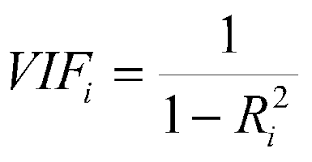

$Method-1$:  Variance threshold method

**Droping constanat fetaures**

- If the features or variables having zero varinace

- the feature values through out the data is the same

- you can decide manually what is your desired variance in order to keep the feature

In [1]:
import pandas as pd
dict1={'A':[100,200,300,400],
       'B':[1,2,3,4],
       'C':[10,20,30,40],
       'D':[10,10,10,10]}

df=pd.DataFrame(dict1)
df

,A,B,C,D
0,100,1,10,10
1,200,2,20,10
2,300,3,30,10
3,400,4,40,10


In [2]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
# Threshold variance value
# we want to drop the feaure based on threshold
vt.fit(df)

VarianceThreshold(threshold=0)

In [3]:
dir(vt)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_d

In [4]:
vt.variances_
# 300 is first column variance (T)
# 1.25 is second column variance (T)
# 30 is column varaince (T)
# 0  is fourth column variance (F)

array([300.  ,   1.25,  30.  ,   0.  ])

In [5]:
vt.get_support()

array([ True,  True,  True, False])

In [6]:
vt.get_params()
# Hyper parameter 
# that we are providing inside the function

{'threshold': 0}

In [7]:
vt.threshold

0

In [8]:
cols=vt.get_feature_names_out()
# the above syntax gives the column names
# These fetaure only we want include
df[cols]

,A,B,C
0,100,1,10
1,200,2,20
2,300,3,30
3,400,4,40


In [9]:
## Apply on wine dataset
## Read the data
## Keep the threshold : 0,0.1
## Get the new data

df = pd.read_csv("winequality_red.csv")
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
### Make sure before fitting the dataframe , do not include output column
X=df.drop('quality',axis=1) 
# X it self a data frame
vt.fit(X)
vt.variances_
vt.get_support()
cols=vt.get_feature_names_out()
X[cols]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


$Method-2$:
    
**Information gain**

mutual info classify


- It is value estimating how much relationship/how much information about target variable

- 0 mean both variables are independent

- Here will use entropy or KNN method

In [10]:
import pandas as pd

# Read the data
data=pd.read_csv("winequality_red.csv")

#Sepearte input and target features
X=data.drop('quality',axis=1) # X is dataframe
y=data['quality']   # y is series type

In [11]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,y)
MI

array([0.0359029 , 0.1188773 , 0.06145642, 0.02479829, 0.03615493,
       0.00378716, 0.08617919, 0.08535662, 0.03572094, 0.10493996,
       0.17730721])

In [12]:
d=pd.DataFrame(MI,
             columns=['Information gain'],
             index=X.columns)
d.sort_values('Information gain',ascending=False)

# we need to select manaualy
# How about python will provide top 5 or top 10 or top k
# SelectKBest

,Information gain
alcohol,0.177307
volatile acidity,0.118877
sulphates,0.104940
total sulfur dioxide,0.086179
density,0.085357
citric acid,0.061456
chlorides,0.036155
fixed acidity,0.035903
pH,0.035721
residual sugar,0.024798


In [13]:
# Two methods almost enough
# Constan features ==== you need to remove
# Mutual information
val=pd.Series(MI)    # index with series
val.index=X.columns  # column with series
val

fixed acidity           0.035903
volatile acidity        0.118877
citric acid             0.061456
residual sugar          0.024798
chlorides               0.036155
free sulfur dioxide     0.003787
total sulfur dioxide    0.086179
density                 0.085357
pH                      0.035721
sulphates               0.104940
alcohol                 0.177307
dtype: float64

In [14]:
val.sort_values(ascending=True)

free sulfur dioxide     0.003787
residual sugar          0.024798
pH                      0.035721
fixed acidity           0.035903
chlorides               0.036155
citric acid             0.061456
density                 0.085357
total sulfur dioxide    0.086179
sulphates               0.104940
volatile acidity        0.118877
alcohol                 0.177307
dtype: float64

<Axes: >

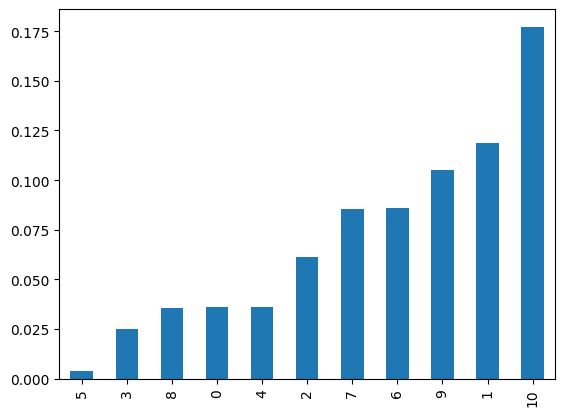

In [15]:
val=pd.Series(MI) 
val.sort_values(ascending=True).plot(kind='bar')

is this suitable for both classification and regression sir mutual info

at which step will do these feature selection

why we are splitting : x and y
    
python code will allow X and y sepeartely

thats why we are splitting

ones we extract the important fetaures , those features used to develop a model



$SelectKbest$

In [16]:
data=pd.read_csv("winequality_red.csv")
data.head()               

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
import pandas as pd

# Read the data
data=pd.read_csv("winequality_red.csv")

#Sepearte input and target features
X=data.drop('quality',axis=1) 
y=data['quality']

# Assume that you did not done mutual info classii
top_5=SelectKBest(mutual_info_classif,k=5)
val=top_5.fit(X,y)

# from sklearn.feature_selection import mutual_info_classif
# MI=mutual_info_classif(X,y)
# MI

In [18]:
val.get_support()

array([False,  True,  True, False, False, False, False,  True, False,
        True,  True])

In [19]:
val.get_feature_names_out()

array(['volatile acidity', 'citric acid', 'density', 'sulphates',
       'alcohol'], dtype=object)

In [20]:
val.get_params()  #

{'k': 5,
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None, n_jobs=None)>}

In [21]:
val.scores_

array([0.04458277, 0.12044463, 0.0593919 , 0.01111796, 0.04255328,
       0.0048144 , 0.05462852, 0.08275532, 0.01210187, 0.09376991,
       0.16587172])

**Method-3**

$p-value$

we can develop Linear regression model using two packages

- Sklearn

  - Have linear model 

  - It gives intercept , coeff, MSE, Rsquare etc

  - But it did not give the p-value

- stats

  - Have OLS method

  - It gives intercept, coeff, Rsquare also P-value table

  - We can select important features using p-value

In [23]:
############## All together ##############
#Step-1: Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2:  Read the data
df = pd.read_csv("winequality_red.csv")
df.head()

# Step-3(Optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as NuLL  or NaN
#         if you are seeing this check it is really a missing values  
#         or  data has empty rows (alternative rows)
df.dropna(inplace=True)
df.reset_index(inplace=True)

##################### EDA ##################
#Numerical data  shoudl be ready  before go to the step-4 
############################################# 

# Step-4: Divide into X and y
X=df.drop('quality',axis=1)
y=df['quality']

# Step-5: Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)


from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6888.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                        0.00
Time:                        13:00:45   Log-Likelihood:                         -1114.5
No. Observations:                1119   AIC:                                      2253.
Df Residuals:                    1107   BIC:                                      2313.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
index                -5.673e-05   4.81e-05     -1.180      0.238      -0.000    3.76e-05
fixed acidity            0.0079      0.021      0.383      0.701      -0.033       0.048
volatile acidity        -1.1899      0.142     -8.356      0.000      -1.469      -0.910
citric acid             -0.2576      0.178     -1.445      0.149      -0.607       0.092
residual sugar          -0.0027      0.014     -0.189      0.850      -0.031       0.025
chlorides               -1.5908      0.495     -3.217      0.001      -2.561      -0.620
free sulfur dioxide      0.0074      0.003      2.731      0.006       0.002       0.013
total sulfur dioxide    -0.0043      0.001     -4.413      0.000      -0.006      -0.002
density                  4.4695      0.780      5.727      0.000       2.938       6.001
pH                      -0.5425      0.198     -2.735      0.006      -0.932      -0.153
sulphates                0.9274      0.133      6.965      0.000       0.666       1.189
alcohol                  0.3140      0.022     14.165      0.000       0.270       0.357
==============================================================================
Omnibus:                       13.424   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.573
Skew:                          -0.167   Prob(JB):                     0.000252
Kurtosis:                       3.494   Cond. No.                     3.85e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Based on alpha= 0.05

- We will reject 3 columns: Fixed acidity,Citric acid, Residual sugar

- Again we need to build the model by using other features

**Method-4**

$VIF$

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'X1': np.random.randn(100),
    'X2': np.random.randn(100),
    'X3': np.random.randn(100)
}

df = pd.DataFrame(data)

# Adding a multicollinear variable
df['X4'] = 2*df['X1'] + 3*df['X2'] + np.random.normal(0, 0.1, 100)

# Fit a multiple regression model
X = df[['X1', 'X2', 'X3', 'X4']]
y = np.random.randn(100)
model = sm.OLS(y, sm.add_constant(X)).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


  feature          VIF
0      X1   298.996568
1      X2   875.427070
2      X3     1.024774
3      X4  1333.805691


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.200
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.316
Time:                        13:01:01   Log-Likelihood:                -144.49
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      95   BIC:                             312.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0474      0.106      0.447      0.656      -0.163       0.258
X1             4.6170      2.191      2.107      0.038       0.267       8.967
X2             6.8238      3.253      2.098      0.039       0.366      13.281
X3             0.0943      0.114      0.826      0.411      -0.132       0.321
X4            -2.2826      1.083     -2.108      0.038      -4.432      -0.133
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.560
Skew:                           0.303   Prob(JB):                        0.458
Kurtosis:                       2.919   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2:  Read the data
df = pd.read_csv("winequality_red.csv")
df.head()

# Step-3(Optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as NuLL  or NaN
#         if you are seeing this check it is really a missing values  
#         or  data has empty rows (alternative rows)
df.dropna(inplace=True)
df.reset_index(inplace=True)

##################### EDA ##################
#Numerical data  shoudl be ready  before go to the step-4 
############################################# 

# Step-4: Divide into X and y
X=df.drop('quality',axis=1)
y=df['quality']

In [28]:
X.values,2

(array([[0.000e+00, 7.400e+00, 7.000e-01, ..., 3.510e+00, 5.600e-01,
         9.400e+00],
        [1.000e+00, 7.800e+00, 8.800e-01, ..., 3.200e+00, 6.800e-01,
         9.800e+00],
        [2.000e+00, 7.800e+00, 7.600e-01, ..., 3.260e+00, 6.500e-01,
         9.800e+00],
        ...,
        [1.596e+03, 6.300e+00, 5.100e-01, ..., 3.420e+00, 7.500e-01,
         1.100e+01],
        [1.597e+03, 5.900e+00, 6.450e-01, ..., 3.570e+00, 7.100e-01,
         1.020e+01],
        [1.598e+03, 6.000e+00, 3.100e-01, ..., 3.390e+00, 6.600e-01,
         1.100e+01]], shape=(1599, 12)),
 2)

In [ ]:
 variance_inflation_factor(X.values,0)
# X.values ==== all the columns data
# VIF  one column o/p= input
VIF(data,which column)

In [30]:
# Calculate VIF
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()  # Empty data frame
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature          VIF
0                  index     5.054246
1          fixed acidity    80.338968
2       volatile acidity    17.065205
3            citric acid     9.197695
4         residual sugar     4.663513
5              chlorides     6.573395
6    free sulfur dioxide     6.781651
7   total sulfur dioxide     6.916574
8                density  1551.937829
9                     pH  1109.622836
10             sulphates    21.844623
11               alcohol   130.707581
